<a href="https://colab.research.google.com/github/tara618/symmetrical-octo-palm-tree/blob/main/Lab_9%2610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('waterPotability_updated.csv')
df.sample(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
148,9.630665,152.862433,23641.702565,6.925706,333.148318,417.167073,16.670184,89.997574,4.920091,0
965,7.986399,202.093940,20447.490132,5.689518,333.775777,477.668836,12.258396,43.841692,4.814779,0
3019,9.347345,201.632836,13749.596037,7.333742,322.044667,512.446305,12.434716,43.827119,3.615151,0
3071,10.209956,148.379235,18413.096820,7.407967,390.619013,410.568172,15.103624,89.178485,4.112598,0
2837,6.643734,202.413638,14110.920968,8.754110,340.975559,291.084744,15.954655,64.363793,3.920607,1
2688,6.089431,207.267133,11339.166055,8.888347,317.279123,531.768988,11.674318,48.358250,4.366861,0
723,10.137932,242.005716,15088.827653,8.677789,333.775777,596.346346,14.971199,62.365824,3.872018,1
914,5.791154,190.431679,20288.235569,6.298366,347.041020,544.857481,17.706838,84.388191,4.104835,0
1254,6.704792,176.896033,28140.768155,6.942107,333.775777,455.972627,16.035980,40.076113,3.806596,0
2569,4.624304,121.036319,22981.749411,8.297074,372.037359,260.566164,13.054030,66.553465,3.424250,0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df.drop("Potability", axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

merged_df = pd.concat([X_train, X_test], ignore_index=True)

scaler = StandardScaler()
merged_df_scaled = scaler.fit_transform(merged_df)

kmeans = KMeans(n_clusters=5, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(merged_df_scaled)

print(merged_df[['Cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Cluster
0           4
1           2
2           1
3           4
4           3
...       ...
3271        4
3272        1
3273        0
3274        2
3275        4

[3276 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

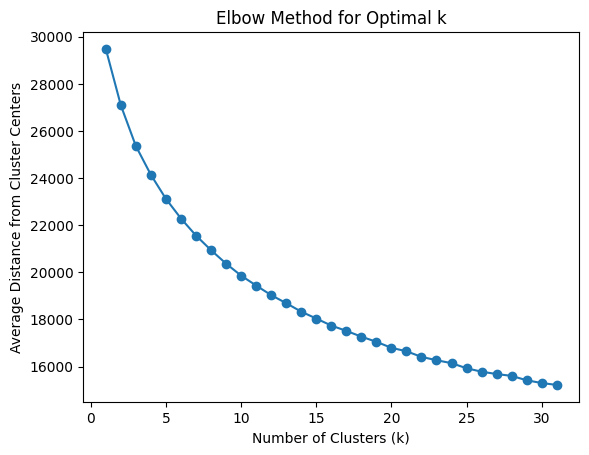

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df.drop('Potability', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

distances = []

for k in range(1, 32):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distances.append(kmeans.inertia_)

plt.plot(range(1, 32), distances, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Distance from Cluster Centers')
plt.show()

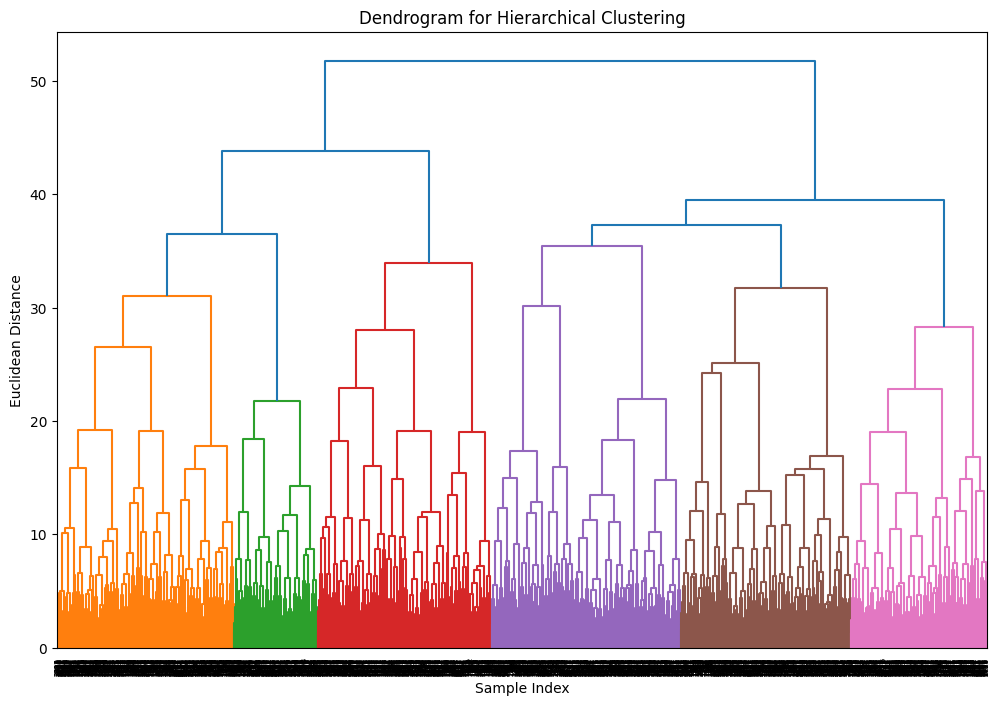

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

X = df.drop('Potability', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linked = linkage(X_scaled, 'ward')

plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

Selected Features: ('ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon', 'Trihalomethanes')


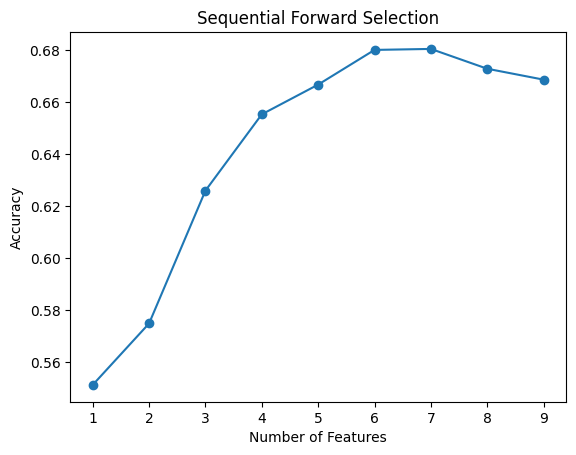

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

sfs = SequentialFeatureSelector(clf,
                                k_features='best',
                                forward=True,
                                floating=False,
                                scoring='accuracy',
                                cv=5)

sfs.fit(X_train, y_train)

print("Selected Features:", sfs.k_feature_names_)

fig = plt.figure()
k_feat = list(sfs.subsets_.keys())
scores = [sfs.subsets_[k]['avg_score'] for k in k_feat]
plt.plot(k_feat, scores, marker='o')
plt.title('Sequential Forward Selection')
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.show()

Number of features needed to capture 95% of data variance: 9


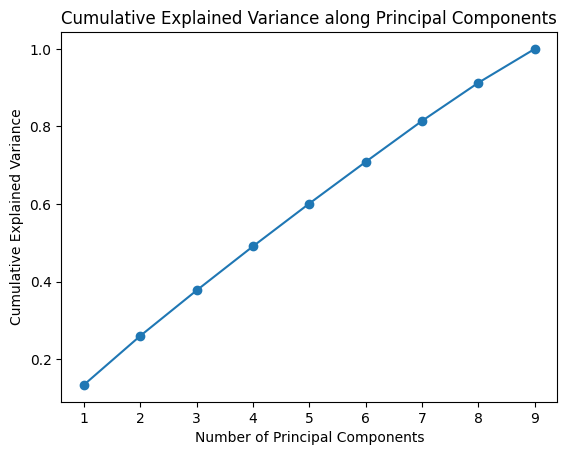

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop('Potability', axis=1)
y = df['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

cumulative_variance = pca.explained_variance_ratio_.cumsum()
num_features_95_percent_variance = sum(cumulative_variance < 0.95) + 1

print("Number of features needed to capture 95% of data variance:", num_features_95_percent_variance)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance along Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.drop('Potability', axis=1)
y = df['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = num_features_95_percent_variance
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using the transformed dataset:", accuracy)

Accuracy using the transformed dataset: 0.6646341463414634
